In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [78]:
df= pd.read_csv("insurance_part2_data.csv")

In [79]:
df.head(10)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA
5,45,JZI,Airlines,Yes,15.75,Online,8,45.00,Bronze Plan,ASIA
6,61,CWT,Travel Agency,No,35.64,Online,30,59.40,Customised Plan,Americas
7,36,EPX,Travel Agency,No,0.00,Online,16,80.00,Cancellation Plan,ASIA
8,36,EPX,Travel Agency,No,0.00,Online,19,14.00,Cancellation Plan,ASIA
9,36,EPX,Travel Agency,No,0.00,Online,42,43.00,Cancellation Plan,ASIA


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [81]:
df.nunique()

Age              70
Agency_Code       4
Type              2
Claimed           2
Commision       324
Channel           2
Duration        257
Sales           380
Product Name      5
Destination       3
dtype: int64

In [82]:
df.shape

(3000, 10)

In [83]:
df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [84]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


## EDA for variables.

## Histogram and Boxplot for continuous variables

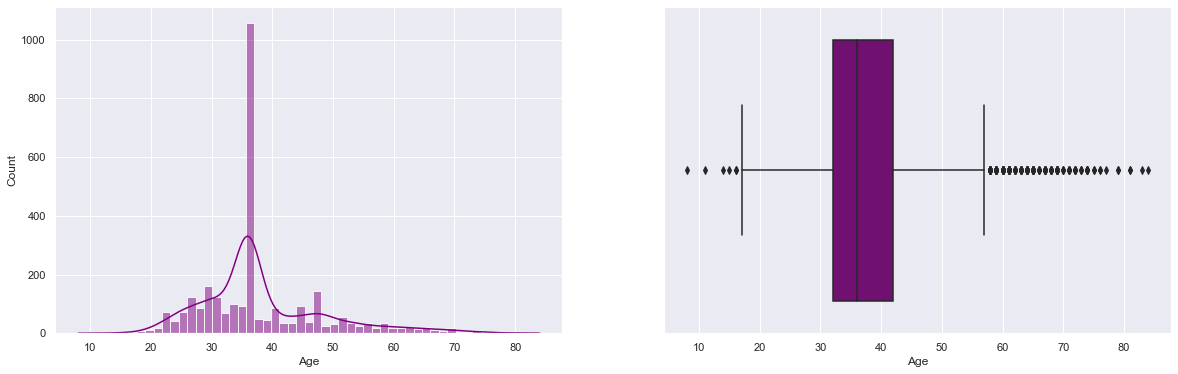

In [85]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.histplot(df.Age, kde=True, ax=axs[0], color='purple')
sns.boxplot(x='Age',data=df, ax=axs[1], color='purple');

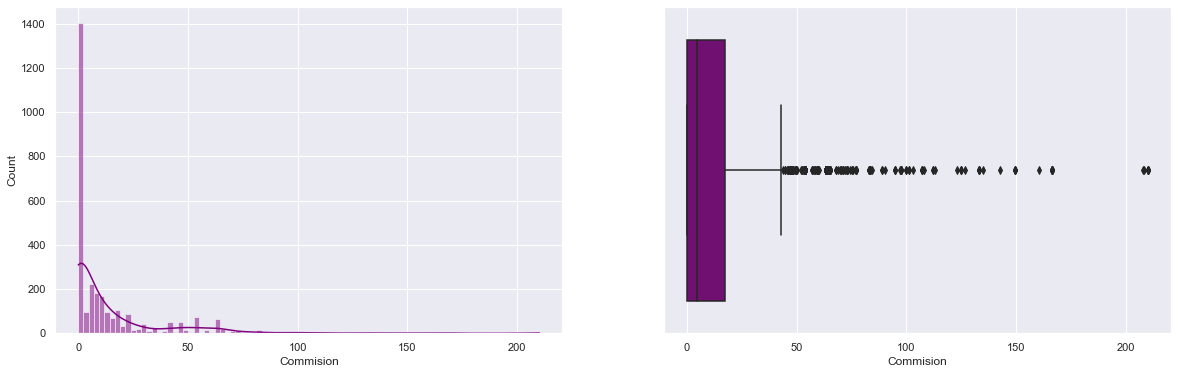

In [86]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.histplot(df.Commision, kde=True, ax=axs[0], color='purple')
sns.boxplot(x='Commision',data=df, ax=axs[1], color='purple');

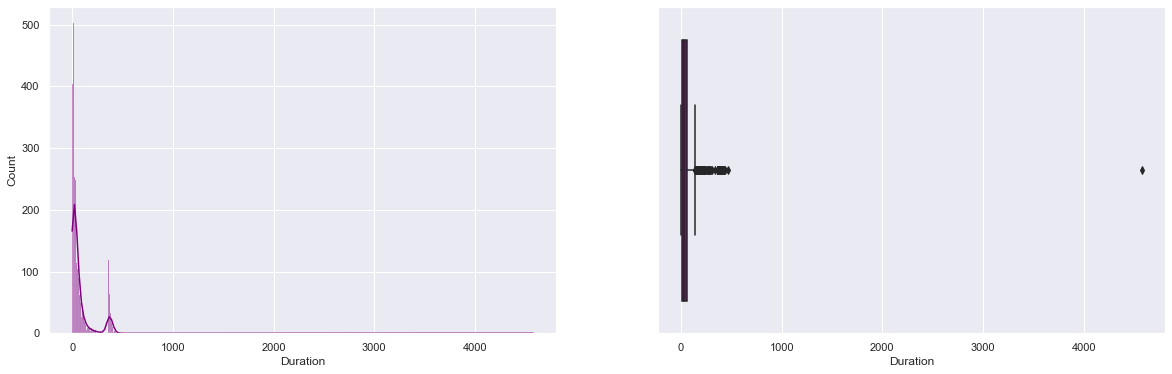

In [87]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.histplot(df.Duration, kde=True, ax=axs[0], color='purple')
sns.boxplot(x='Duration',data=df, ax=axs[1], color='purple');

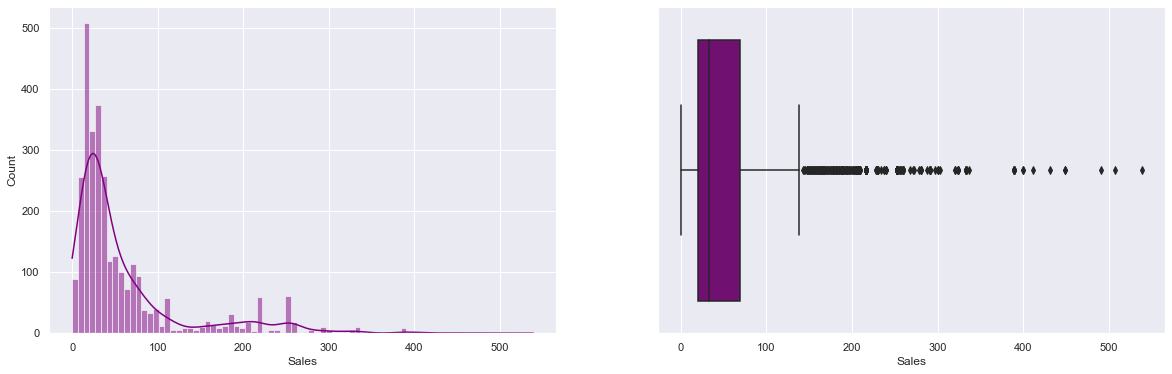

In [88]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.histplot(df.Sales, kde=True, ax=axs[0], color='purple')
sns.boxplot(x='Sales',data=df, ax=axs[1], color='purple');

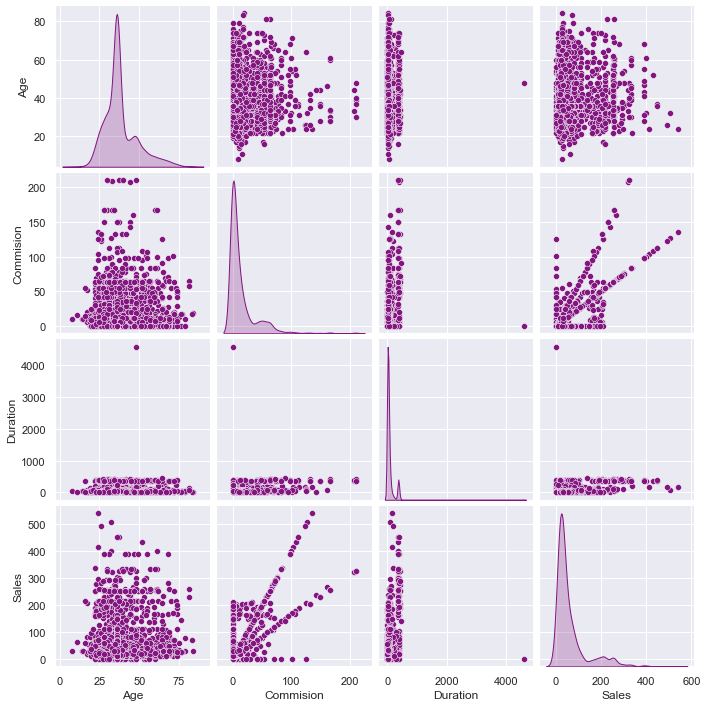

In [89]:
sns.set(style="darkgrid", color_codes=True, palette= 'BuPu_r')
sns.pairplot(df, diag_kind='kde')
plt.show()

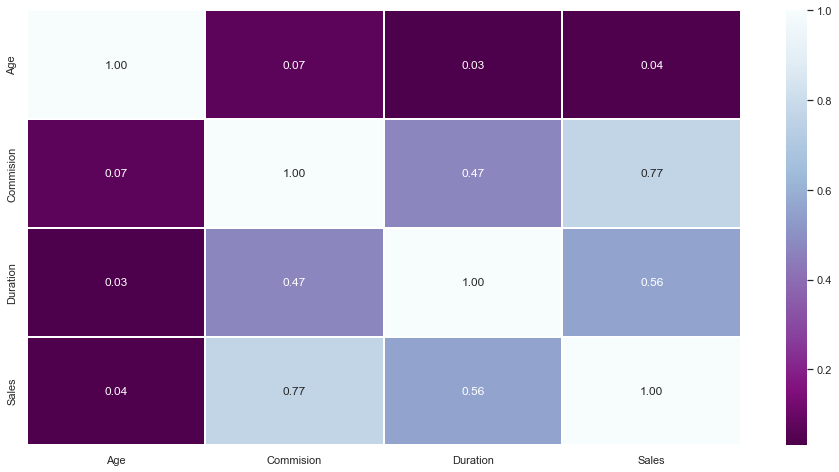

In [90]:
corr = df.corr()
f,ax = plt.subplots(figsize=(16,8))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',cmap='BuPu_r',ax=ax)
plt.show()

## Count plot and bar plot for categorical variables



C:\Users\Honey Sam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


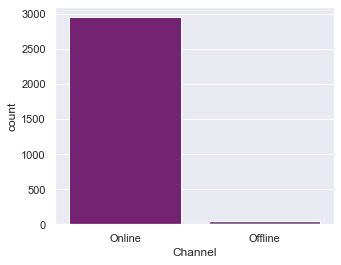

In [91]:
fig = plt.figure(figsize =(5, 4))
sns.countplot(df['Channel'],order = df['Channel'].value_counts().index)
plt.show();

C:\Users\Honey Sam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


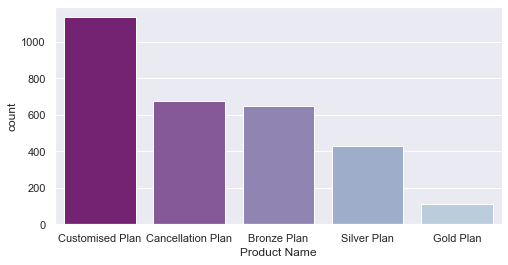

In [92]:
fig = plt.figure(figsize =(8, 4))
sns.countplot(df['Product Name'],order = df['Product Name'].value_counts().index)
plt.show();

C:\Users\Honey Sam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


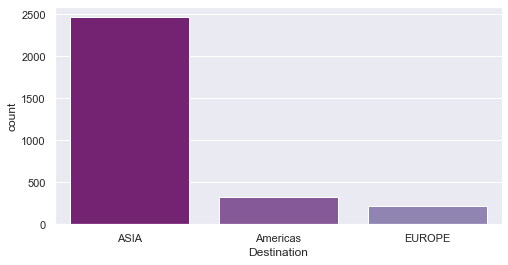

In [93]:
fig = plt.figure(figsize =(8, 4))
sns.countplot(df['Destination'],order = df['Destination'].value_counts().index)
plt.show();

C:\Users\Honey Sam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


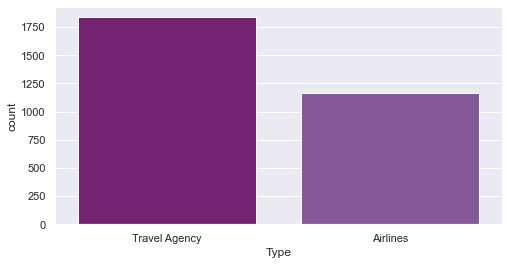

In [94]:
fig = plt.figure(figsize =(8, 4))
sns.countplot(df['Type'],order = df['Type'].value_counts().index)
plt.show();

C:\Users\Honey Sam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


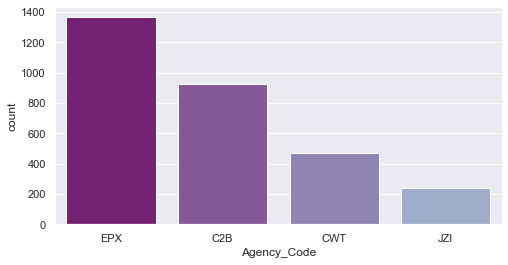

In [95]:
fig = plt.figure(figsize =(8, 4))
sns.countplot(df['Agency_Code'],order = df['Agency_Code'].value_counts().index)
plt.show();

In [96]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [97]:
print('Agency_Code \n',df.Agency_Code.value_counts())
print('\n')
print('Type \n',df.Type.value_counts())
print('\n')
print('Claimed \n',df.Claimed.value_counts())
print('\n')
print('Channel \n',df.Channel.value_counts())
print('\n')
print('Product Name \n',df['Product Name'].value_counts())
print('\n')
print('Destination \n',df.Destination.value_counts())

Agency_Code 
 2    1365
0     924
1     472
3     239
Name: Agency_Code, dtype: int64


Type 
 1    1837
0    1163
Name: Type, dtype: int64


Claimed 
 0    2076
1     924
Name: Claimed, dtype: int64


Channel 
 1    2954
0      46
Name: Channel, dtype: int64


Product Name 
 2    1136
1     678
0     650
4     427
3     109
Name: Product Name, dtype: int64


Destination 
 0    2465
1     320
2     215
Name: Destination, dtype: int64


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [98]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [100]:
print(df.Claimed.value_counts())
print('%1s = ',2076/(2076+924)*100)
print('%0s = ',924/(2076+924)*100)

0    2076
1     924
Name: Claimed, dtype: int64
%1s =  69.19999999999999
%0s =  30.8


In [101]:
X = df.drop("Claimed", axis=1)

y = df.pop("Claimed")

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [104]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)
print('Total Obs',2100+900)

X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)
Total Obs 3000


In [105]:
dt_model = DecisionTreeClassifier(criterion = 'gini', random_state=1)

In [106]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(random_state=1)

In [107]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()

In [108]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Duration      0.262122
Sales         0.199864
Agency_Code   0.194770
Age           0.177894
Commision     0.095127
Product Name  0.043258
Destination   0.019321
Channel       0.007262
Type          0.000383


In [109]:
y_predict = dt_model.predict(X_test)

In [110]:
y_predict.shape


(900,)

In [111]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 30,min_samples_leaf=100,min_samples_split=1000,random_state=1)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=30, min_samples_leaf=100,
                       min_samples_split=1000, random_state=1)

In [112]:
ld_tree_regularized = open('ld_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= ld_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

ld_tree_regularized.close()
dot_data

In [113]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.890699
Sales         0.109301
Age           0.000000
Type          0.000000
Commision     0.000000
Channel       0.000000
Duration      0.000000
Product Name  0.000000
Destination   0.000000


In [114]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [115]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (2100,)
ytest_predict (900,)


In [116]:
ytest_predict

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,

In [117]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob

array([[0.74343122, 0.25656878],
       [0.4119403 , 0.5880597 ],
       [0.4119403 , 0.5880597 ],
       ...,
       [0.4119403 , 0.5880597 ],
       [0.91187739, 0.08812261],
       [0.91187739, 0.08812261]])

In [118]:
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.743431,0.256569
1,0.411940,0.588060
2,0.411940,0.588060
3,0.411940,0.588060
4,0.911877,0.088123


In [119]:
import matplotlib.pyplot as plt


AUC: 0.765


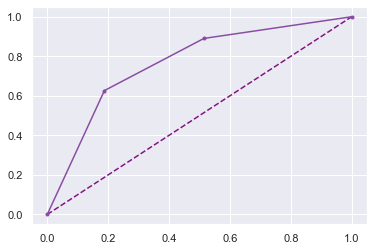

In [120]:
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.753


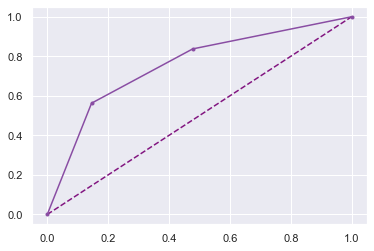

In [121]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [122]:
from sklearn.metrics import classification_report,confusion_matrix

In [123]:
confusion_matrix(train_labels, ytrain_predict)

array([[1195,  276],
       [ 235,  394]], dtype=int64)

In [124]:
reg_dt_model.score(X_train,train_labels) 

0.7566666666666667

In [126]:
print((1195+394)/(1195+276+235+394))

0.7566666666666667


In [127]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1471
           1       0.59      0.63      0.61       629

    accuracy                           0.76      2100
   macro avg       0.71      0.72      0.72      2100
weighted avg       0.76      0.76      0.76      2100



In [128]:
confusion_matrix(test_labels, ytest_predict)

array([[517,  88],
       [129, 166]], dtype=int64)

In [129]:
reg_dt_model.score(X_test,test_labels)


0.7588888888888888

In [130]:
print((517+166)/(517+88+129+166))


0.7588888888888888


In [131]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       605
           1       0.65      0.56      0.60       295

    accuracy                           0.76       900
   macro avg       0.73      0.71      0.72       900
weighted avg       0.75      0.76      0.75       900



## Random Forest Classifier

In [132]:
from sklearn.ensemble import RandomForestClassifier

In [146]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7, 8],
    'max_features': [11, 12, 13],
    'min_samples_leaf': [20, 25],
    'min_samples_split': [60, 75],
    'n_estimators': [101, 301]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [148]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 11,
 'min_samples_leaf': 20,
 'min_samples_split': 60,
 'n_estimators': 101}

In [149]:
best_grid = grid_search.best_estimator_

In [150]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

IndexError: list index out of range

In [133]:
rfcl = RandomForestClassifier(n_estimators = 501)from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7, 8],
    'max_features': [11, 12, 13],
    'min_samples_leaf': [20, 25],
    'min_samples_split': [60, 75],
    'n_estimators': [101, 301]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

grid_search.fit(X_train, train_labels)


grid_search.best_params_

best_grid = grid_search.best_estimator_

ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)
rfcl = rfcl.fit(X_train, train_labels)

In [141]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7, 10],
    'max_features': [4, 6],
    'min_samples_leaf': [50, 100],
    'min_samples_split': [150, 300],
    'n_estimators': [301, 501]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)


In [139]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [50, 100],
                         'min_samples_split': [150, 300],
                         'n_estimators': [301, 501]})

In [140]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 4,
 'min_samples_leaf': 50,
 'min_samples_split': 300,
 'n_estimators': 501}

In [145]:
best_grid = grid_search.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'